Fitting 4 folds for each of 180 candidates, totalling 720 fits


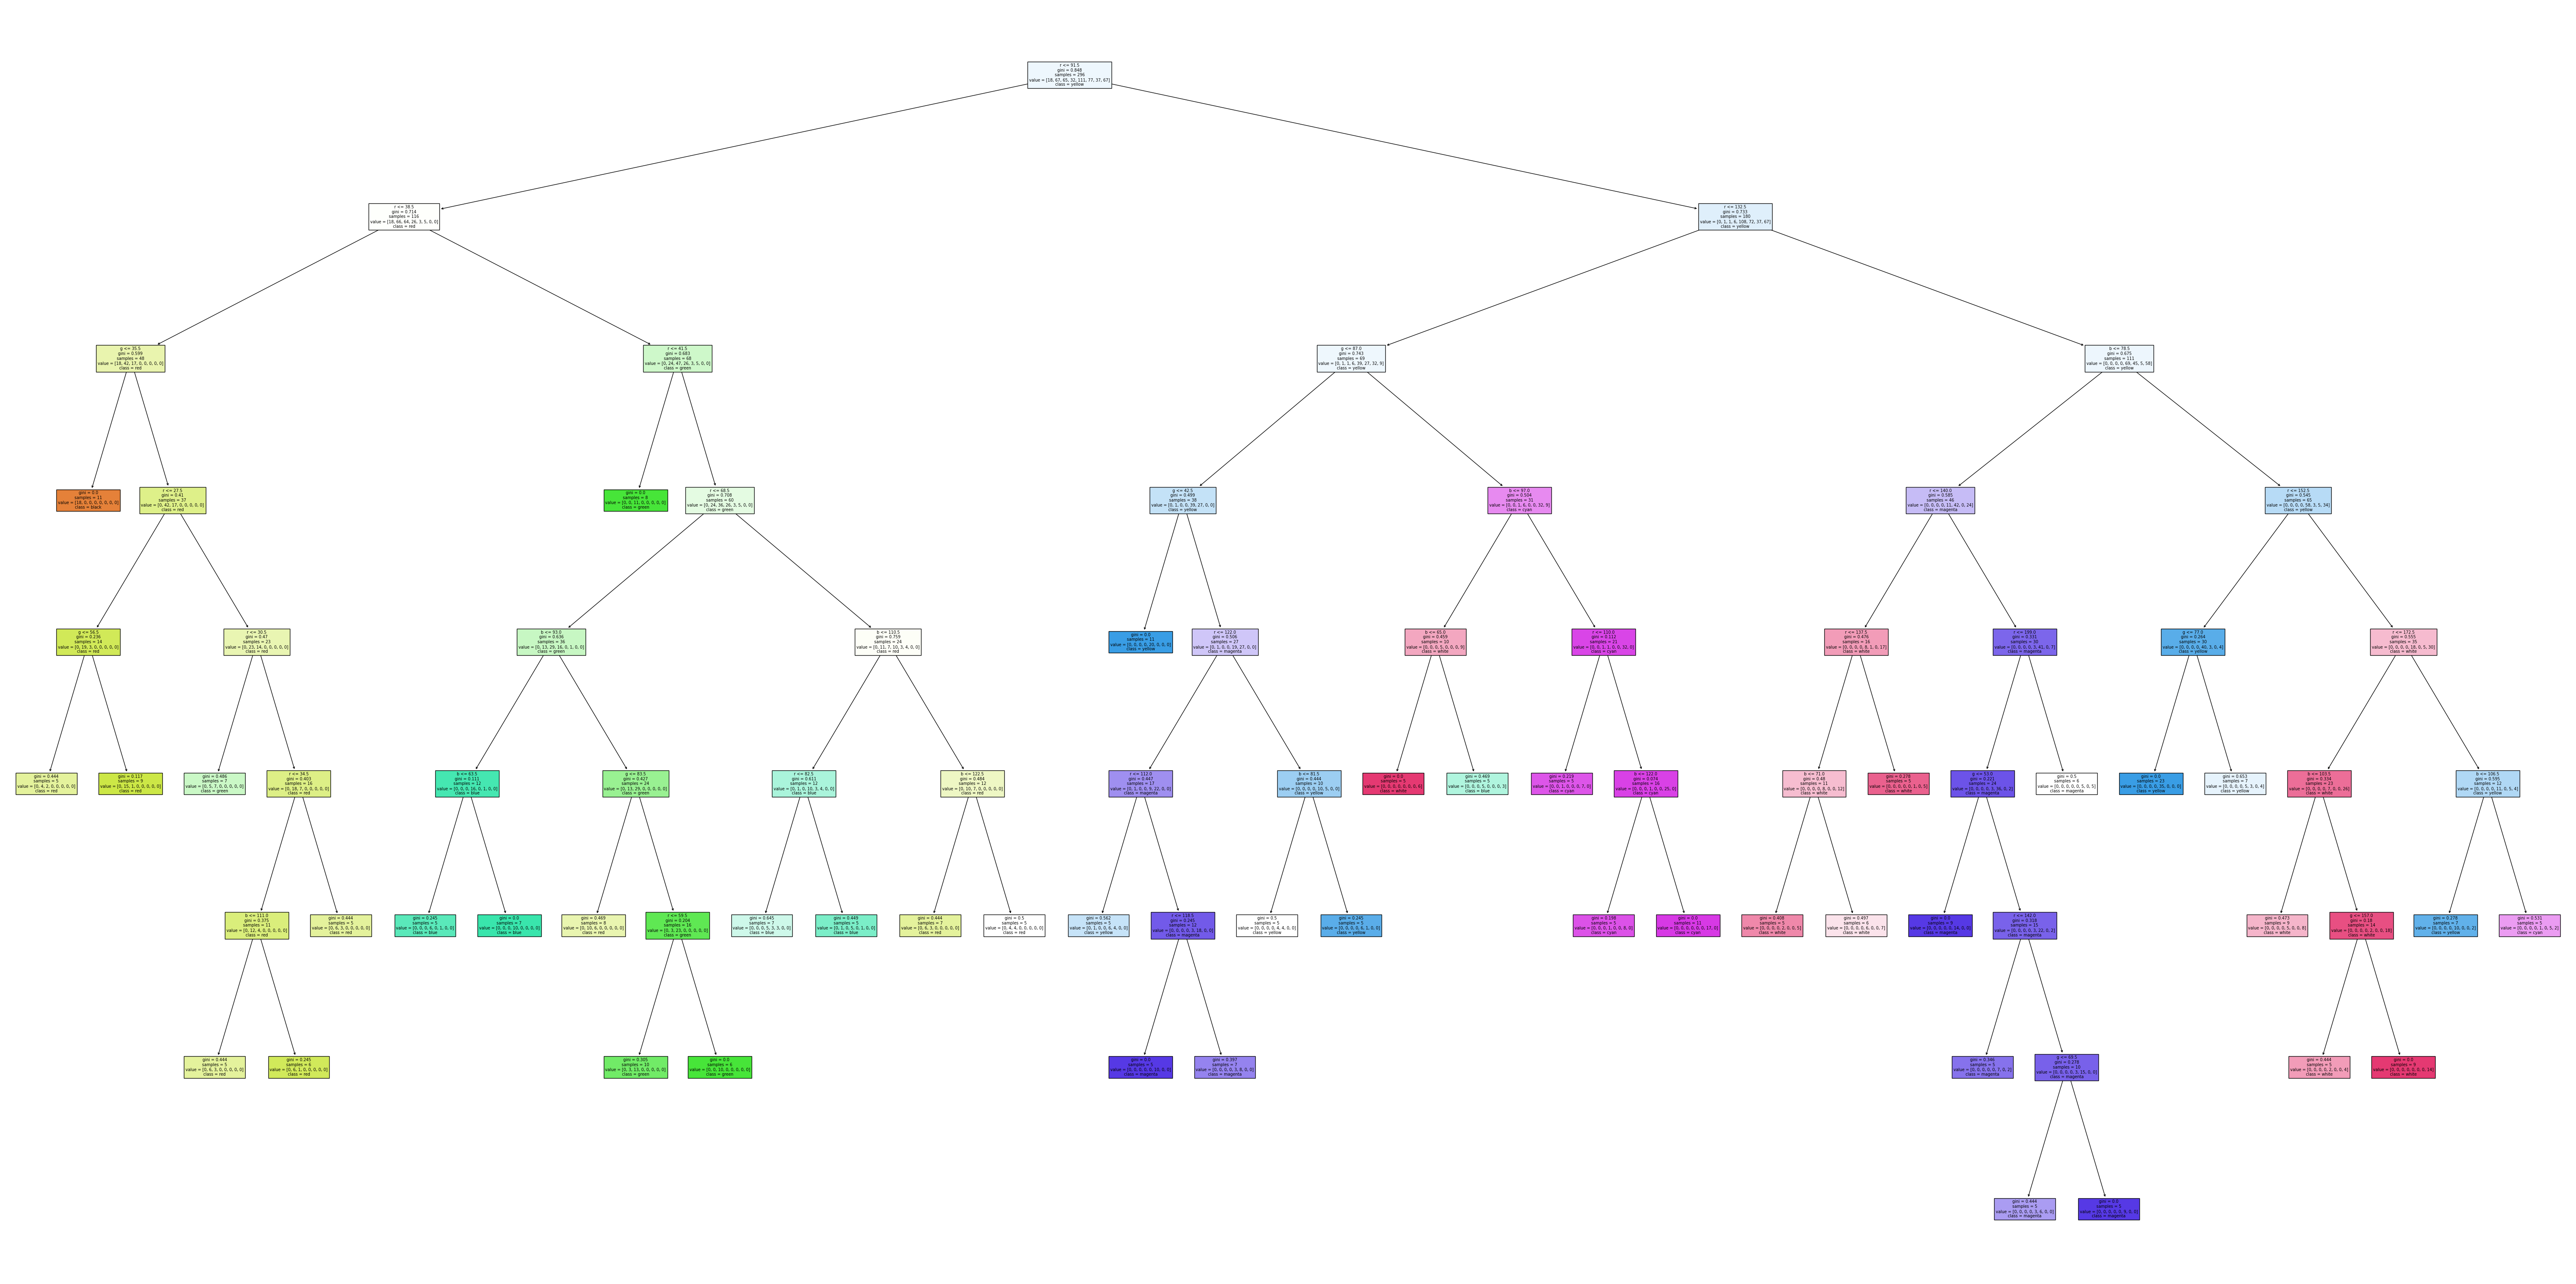

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from glob import glob

#processing datasets
df = pd.read_csv(r"C:/Users/hsiun/OneDrive/文件/colors_new.csv")

X = df.drop('color', axis = 1)
y = df['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 12345)
X_train.shape, X_test.shape

#model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 12345, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)
classifier_rf.fit(X_train, y_train)

#checking the oob score
classifier_rf.oob_score_

rf = RandomForestClassifier(random_state = 12345, n_jobs = -1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_score_

rf_best = grid_search.best_estimator_

#visualize
from sklearn.tree import plot_tree
plt.figure(figsize = (80, 40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['black', 'red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white'],filled=True);